In [1]:
import numpy as np
import pandas as pd

In [2]:
f = pd.read_csv('gocerywebsite.csv')

In [3]:
f.head()

,RecordID,IP Address,LoggedInFlag,ServerID,VisitPageFlag
0,1,39.13.114.2,1,2,0
1,2,13.3.25.8,1,1,0
2,3,247.8.211.8,1,1,0
3,4,124.8.220.3,0,3,0
4,5,60.10.192.7,0,2,0


In [4]:
f.shape

(184588, 5)

# Clean data set 

In [5]:
df = f.groupby(['IP Address'],as_index = False).agg({'VisitPageFlag':'sum', 'LoggedInFlag':'first',
                                                     'ServerID':'first','RecordID':'first'})

In [6]:
df = df.sort_values(by=['RecordID'])

In [7]:
# select users who is not a member
dfuser = df[df['LoggedInFlag']==0]

In [8]:
dfuser.head()

,IP Address,VisitPageFlag,LoggedInFlag,ServerID,RecordID
11643,124.8.220.3,1,0,3,4
82802,60.10.192.7,1,0,2,5
98644,97.6.126.6,1,0,3,8
71045,32.6.213.1,0,0,2,11
38662,188.13.62.2,0,0,3,13


In [9]:
# identify each record which belongs to a control group or treatment group
dfuser.loc[dfuser['ServerID'] == 2, 'Group'] = 'control'
dfuser.loc[dfuser['ServerID'] == 3, 'Group'] = 'control'
dfuser.loc[dfuser['ServerID'] == 1, 'Group'] = 'treatment'

/Users/shenlanhui/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/shenlanhui/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [10]:
dfuser.head()

,IP Address,VisitPageFlag,LoggedInFlag,ServerID,RecordID,Group
11643,124.8.220.3,1,0,3,4,control
82802,60.10.192.7,1,0,2,5,control
98644,97.6.126.6,1,0,3,8,control
71045,32.6.213.1,0,0,2,11,control
38662,188.13.62.2,0,0,3,13,control


# A/B test -- T-test

In [11]:
df_control = dfuser[dfuser['Group']=='control']
df_treat = dfuser[dfuser['Group']=='treatment']

In [12]:
lcontrol = df_control['VisitPageFlag']
ltreat = df_treat['VisitPageFlag']

In [13]:
control_num = df_control.shape[0]
treat_num = df_treat.shape[0]

In [14]:
control_con = df_control[df_control['VisitPageFlag']==1]['IP Address'].count()
treat_con = df_treat[df_treat['VisitPageFlag']==1]['IP Address'].count()

In [15]:
control_con,treat_con

(5691, 3529)

In [16]:
per_control_con = control_con/control_num
per_treat_con = treat_con/treat_num

In [19]:
per_control_con,per_treat_con

(0.1730471006780795, 0.21386582631355674)

In [51]:
# show the percentage of concersion rate in a bar chart
import matplotlib.pyplot as plt
import numpy as np

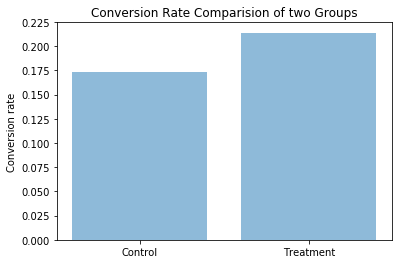

In [21]:
objects = ('Control', 'Treatment')
y_pos = np.arange(len(objects))
percentage = [per_control_con,per_treat_con]

plt.bar(y_pos, percentage, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Conversion rate')
plt.title('Conversion Rate Comparision of two Groups')

plt.show()

In [22]:
from scipy import stats
np.random.seed(12345678) # fix random seed to get same numbers

In [23]:
stats.ttest_ind(lcontrol, ltreat)

Ttest_indResult(statistic=-12.272280143595369, pvalue=1.433194390402562e-34)

# The statistical concept of T-test

In [40]:
np.random.seed(12345678)

In [24]:
# the convert rate of new page under the null
pnew = dfuser['VisitPageFlag'][dfuser['VisitPageFlag']==1].sum()/len(dfuser)

In [25]:
# the convert rate of old page under the null
pold = dfuser['VisitPageFlag'][dfuser['VisitPageFlag']==1].sum()/len(dfuser)

In [27]:
# number of records in control group and treatment group
control_num, treat_num

(32887, 16501)

In [45]:
new_page_converted = np.random.choice([0,1], size = (treat_num, 1) , p =[(1-pnew),pnew])
new_page_converted.mean()

0.19356402642264106

In [46]:
old_page_converted = np.random.choice([0,1], size = (control_num, 1) , p =[(1-pold),pold])
old_page_converted.mean()

0.1865782832122115

In [49]:
differ = new_page_converted.mean() - old_page_converted.mean()
differ

0.006985743210429551

In [50]:
p_diffs = []
for _ in range (10000):
    newsample = np.random.choice([0,1], size = (treat_num, 1) , p =[(1-pnew),pnew])
    oldsample = np.random.choice([0,1], size = (control_num, 1) , p =[(1-pold),pold])
    mean_new = newsample.mean()
    mean_old = oldsample.mean()
    p_diffs.append(mean_new - mean_old)

(array([  11.,  105.,  520., 1566., 2762., 2803., 1581.,  525.,  113.,
          14.]),
 array([-1.42008309e-02, -1.13647131e-02, -8.52859520e-03, -5.69247735e-03,
        -2.85635950e-03, -2.02416434e-05,  2.81587621e-03,  5.65199406e-03,
         8.48811191e-03,  1.13242298e-02,  1.41603476e-02]),
 <a list of 10 Patch objects>)

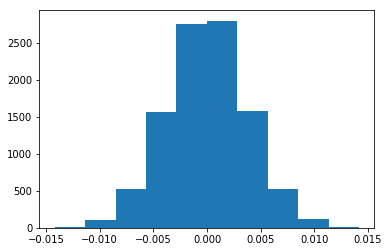

In [53]:
# draw the distribution to check whether the data is normally distributes 
# because t-test is base on normal distribution
plt.hist(p_diffs)

In [54]:
obs_differ = per_treat_con - per_control_con
obs_differ

0.040818725635477254

In [64]:
(p_diffs > obs_differ).mean()

0.0

# using built in Package 

In [61]:
import statsmodels.api as sm

In [63]:
z_score, p_value = sm.stats.proportions_ztest([treat_con, control_con], [treat_num, control_num])
z_score, p_value

(10.980746313140601, 4.729998508573486e-28)